In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-detection/spam.csv


**"Classifying Spam Messages with NLP & ML"**

**Intro - Spam detection is a common NLP problem where we classify messages as either Spam or Not Spam (Ham). This project explores how machine learning models can be used to detect spam messages effectively.**


**Description - spam detection  (/kaggle/input/spam-detection/spam.csv).Key features ( "text" column for messages, "label" column for spamORham).**


In [2]:
#data discover
import pandas as pd
import re
import nltk
df=pd.read_csv('/kaggle/input/spam-detection/spam.csv')
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
##check nulls
print(f"nulls in df:",df.isnull().sum())
print(f"duplication in data are:",df.duplicated().any())

nulls in df: Unnamed: 0    0
spamORham     0
Message       0
dtype: int64
duplication in data are: False


In [4]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.head()

,id,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
##removing unwanted charact

def clean_text(text):
    # Remove unwanted characters (e.g., punctuation, special characters)
    text = re.sub(r"[^a-zA-Z0-9\s']", '', text)
    # Convert to lowercase for uniformity
    text = text.lower()
    return text
df['Message'] = df['Message'].apply(clean_text)


In [6]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
df['tokens'] = df['Message'].apply(word_tokenize)
df.head()


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


,id,spamORham,Message,tokens
0,0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,4,ham,nah i don't think he goes to usf he lives arou...,"[nah, i, do, n't, think, he, goes, to, usf, he..."


In [7]:
#remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords', download_dir='/your/custom/directory')

stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word.lower() not in stop_words]
df['clean_tokens'] = df['tokens'].apply(remove_stop_words)




[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [8]:
#encode spamORham col 
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
df['spamORham'] = label_encoder.fit_transform(df['spamORham'])
print(df['spamORham'].head())


0    0
1    0
2    1
3    0
4    0
Name: spamORham, dtype: int64


In [9]:
import spacy

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Lemmatization function using SpaCy
def spacy_lemmatize(tokens):
    doc = nlp(" ".join(tokens))  # Convert tokens back to a single string
    return [token.lemma_ for token in doc]

# Apply the lemmatization to the 'clean_tokens' column
df['lemmatized_tokens'] = df['clean_tokens'].apply(spacy_lemmatize)


In [10]:
# Combine lemmatized tokens back into a single string
df['final_text'] = df['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))

X = df['final_text']  
y = df['spamORham']   


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_vectorized = vectorizer.fit_transform(X)



**Results and AnalysisAfter training the Multinomial Naïve Bayes model on the spam detection dataset, we evaluated its performance using a classification report and a confusion matrix.**


**Classification ReportThe classification report provides precision, recall, F1-score, and support for each class:**


In [20]:
# Start with raw data
X = df['final_text']
y = df['spamORham']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

results_df = pd.DataFrame({
    "Message": X_test.values,         
    "Actual Label": y_test.values,
    "Predicted Label": y_pred
})

# View results
print(results_df.head(10))


                                             Message  Actual Label  \
0  funny fact nobody teach volcano 2 erupt tsunam...             0   
1  send score sophas secondary application school...             0   
2  know someone know fancy call 09058097218 find ...             1   
3  promise get soon will text morning let know ma...             0   
4  congratulation ur award either 500 cd gift vou...             1   
5                     will text carlos let know hang             0   
6                             ki did't see youkwhere             0   
7                     messageno responcewhat happend             0   
8  get gandhipuram walk cross cut road right side...             0   
9                                   flippin shit yet             0   

   Predicted Label  
0                0  
1                0  
2                1  
3                0  
4                1  
5                0  
6                0  
7                0  
8                0  
9                0 

In [21]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



The confusion matrix shows the model's performance in terms of correctly and incorrectly classified messages:




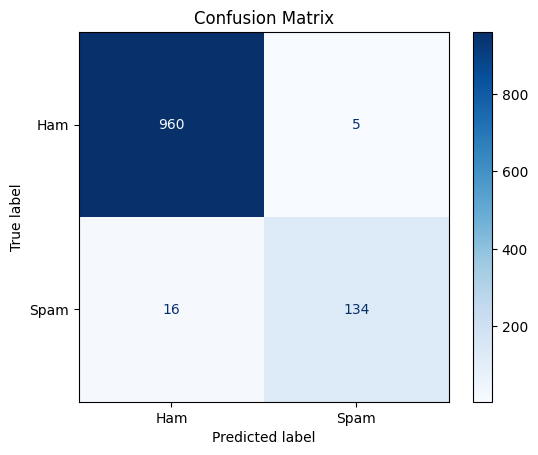

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # 0 = ham, 1 = spam

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [23]:
def predict_message(message):
    transformed = vectorizer.transform([message])
    return model.predict(transformed)[0]


In [24]:
import joblib
joblib.dump(model, "spam_detector_model.pkl")


['spam_detector_model.pkl']


**Conclusion and Future WorkIn this project, we built a spam detection model using Multinomial Naïve Bayes. The model performed well, achieving high accuracy and good classification metrics. However, there are areas for improvement.**
